# Data Visualization with Python


Data visualization is an important step in data science, helping the interlocutor to communicate more easily through figures.

You can find barplot, horizontal barplot, stacked barplot, histogram, boxplot and line plot.

Below you can find how to plot data with Python using pandas plot, seaborn and ploty (two last in a near future).

## Plot from dataframes: using pandas plot

Pandas plot uses matplotlib library under the hood and it is especially helpful when you need to plot results from group by and/or value counts functions.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# df = pd.read_html("https://vincentarelbundock.github.io/Rdatasets/datasets.html")

In [3]:
df = pd.read_csv("data/Womenlf.csv")

In [4]:
df.head()

,Unnamed: 0,partic,hincome,children,region
0,1,not.work,15,present,Ontario
1,2,not.work,13,present,Ontario
2,3,not.work,45,present,Ontario
3,4,not.work,23,present,Ontario
4,5,not.work,19,present,Ontario


A quick data wrangling:
1. rename first column as Id.
2. get more appropriate format for values in column partic: change value from not.work to not_work.

In [5]:
df.rename(columns={"Unnamed: 0": "Id"}, inplace=True)

In [6]:
df.head()

,Id,partic,hincome,children,region
0,1,not.work,15,present,Ontario
1,2,not.work,13,present,Ontario
2,3,not.work,45,present,Ontario
3,4,not.work,23,present,Ontario
4,5,not.work,19,present,Ontario


In [7]:
df.replace({'partic': 'not.work'}, 'not_work', inplace=True)
df.head(2)

,Id,partic,hincome,children,region
0,1,not_work,15,present,Ontario
1,2,not_work,13,present,Ontario


Now we are ready to answer some quentions and exemplify pandas plot!

To make a histogram (plot used for continuous variables) we can just select the variable and define the kind of the plot as hist:

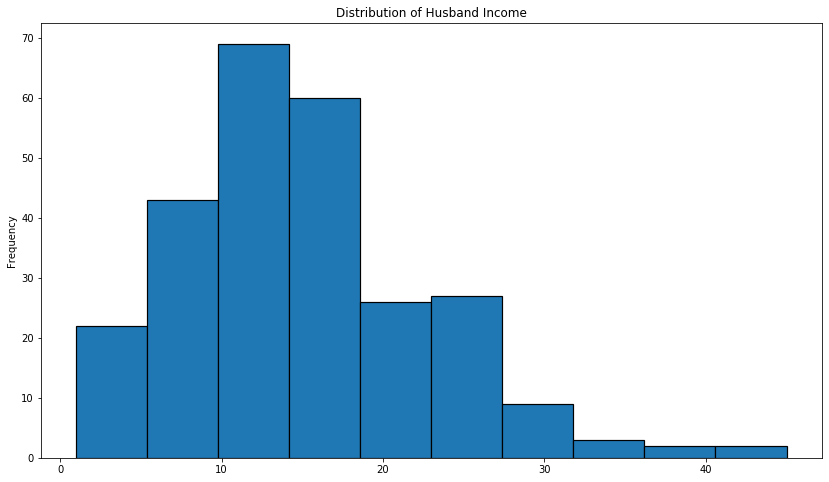

In [8]:
df['hincome'].plot(kind='hist', edgecolor='black', linewidth=1.2, figsize=(14,8),
                   title='Distribution of Husband Income');

In the above plot we saw the distribution of husband income variable, but we are also interested to investigate if there is a difference in this variable according to women participation in income

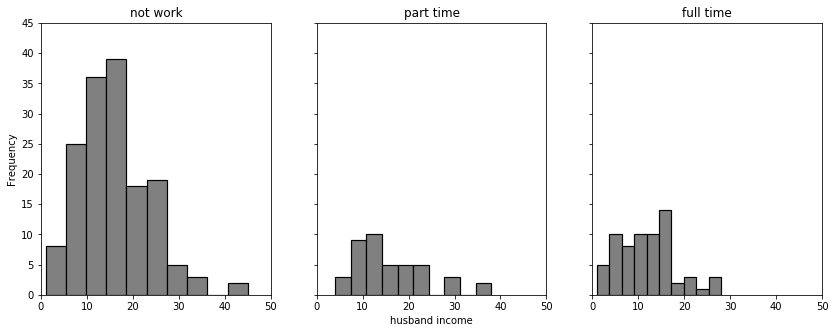

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14,5))

axes[1].set(xlabel='husband income')


df.query("partic == 'not_work'")["hincome"].plot(ax=axes[0],kind='hist', color='grey', edgecolor='black',
                                                 linewidth=1.2, title='not work', xlim=(0,50), ylim=(0,45))
df.query("partic == 'parttime'")["hincome"].plot(ax=axes[1],kind='hist', color='grey', edgecolor='black',
                                                 linewidth=1.2, title='part time', xlim=(0,50), ylim=(0,45))
df.query("partic == 'fulltime'")["hincome"].plot(ax=axes[2],kind='hist', color='grey', edgecolor='black',
                                                 linewidth=1.2, title='full time', xlim=(0,50), ylim=(0,45));

Here we want to visualize if women participation in income is different according to region:

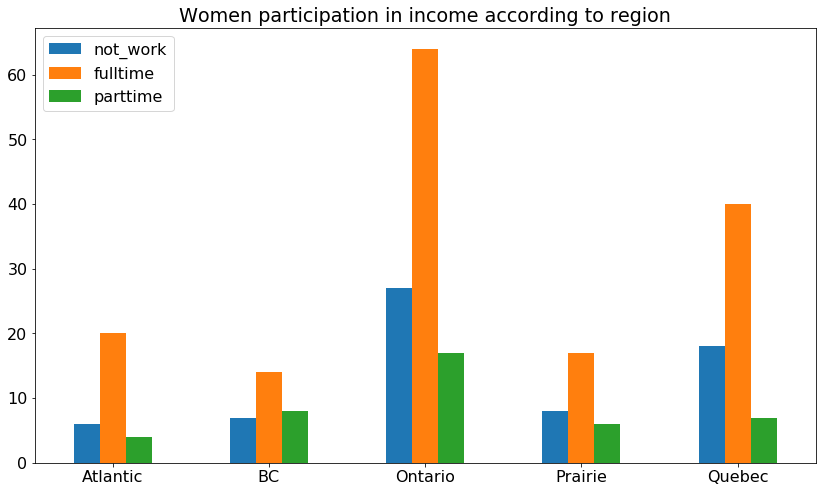

In [10]:
plt.rcParams.update({'font.size': 16})

df.groupby(['region', 'partic'])['Id'].count().unstack().plot(kind='bar', figsize=(14,8),
                                                             title='Women participation in income according to region',
                                                             rot=360);

plt.xlabel('')
labels = df['partic'].unique()
plt.legend(labels, loc='upper left')

plt.show()

Or if you have big names for x label, you can use a horizontal barplot. You just need to add an h in `kind` parameter.

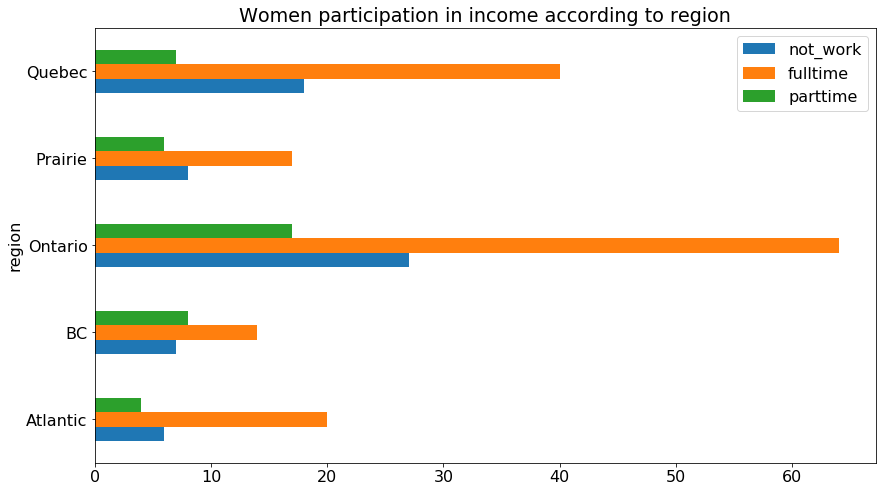

In [11]:
plt.rcParams.update({'font.size': 16})

df.groupby(['region', 'partic'])['Id'].count().unstack().plot(kind='barh', figsize=(14,8),
                                                             title='Women participation in income according to region',
                                                             rot=360);

plt.xlabel('')
labels = df['partic'].unique()
plt.legend(labels, loc='upper right')

plt.show()

The same information above but represented in a stacked way:

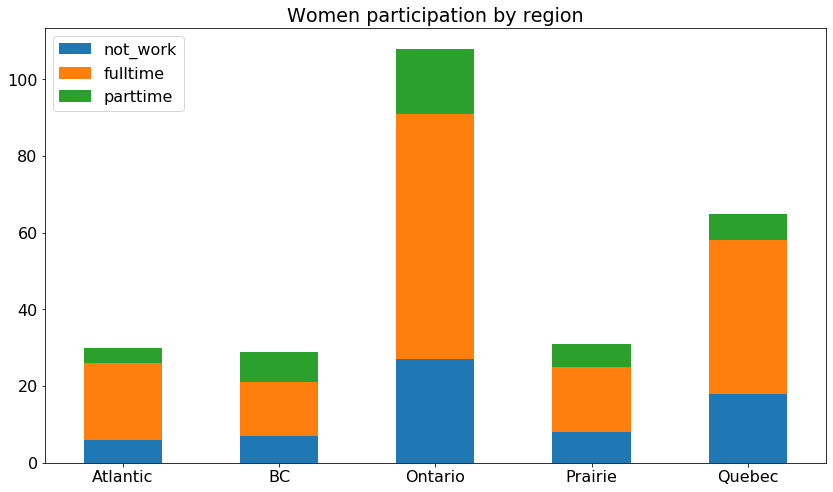

In [12]:
df.groupby(['region','partic'])['Id'] \
                        .size() \
                        .to_frame() \
                        .unstack() \
                        .plot(kind='bar', stacked=True, legend=False, figsize=(14,8),
                             title='Women participation by region',
                             rot=360)

plt.xlabel('')

labels = df['partic'].unique()
plt.legend(labels, loc='upper left')
plt.show()

Stacked barplot represented as percentage:

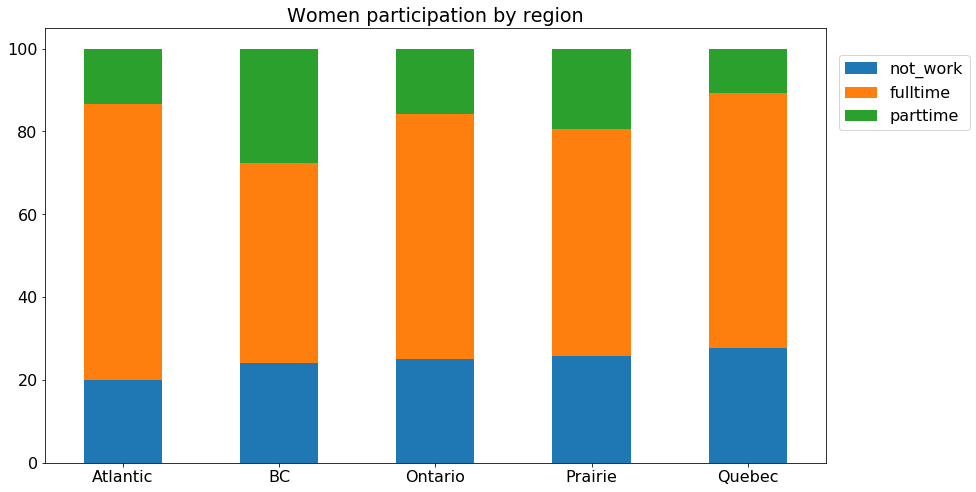

In [13]:
df.groupby(['region','partic'])['Id'] \
                        .size() \
                        .groupby(level=0).apply(lambda x: 100 * x / x.sum()) \
                        .to_frame() \
                        .unstack() \
                        .plot(kind='bar', stacked=True, legend=False, figsize=(14,8),
                             title='Women participation by region')


plt.xlabel('')
plt.xticks(rotation=360)

labels = df['partic'].unique()

plt.legend(labels, loc='center', bbox_to_anchor=(.6, 0.8, 1., .102), ncol=1) # specifies the bbox (x, y, width, height)
plt.show()

Just to exemplify how to make line plot we will create a fake dataset with year, and number of women participating in income along years:

In [14]:
import numpy as np
import random

num_women = random.sample(range(1, 1000), 500)
years = np.random.choice(range(2001, 2020), 500)
partic = ["full_time", "not_work", "part_time"]
partic2 = np.random.choice(partic, 500)

dffk = pd.DataFrame({'number_women': num_women,
                   'year_data': years,
                  'partic': partic2})
dffk.head(2)

,number_women,year_data,partic
0,80,2013,not_work
1,582,2004,part_time


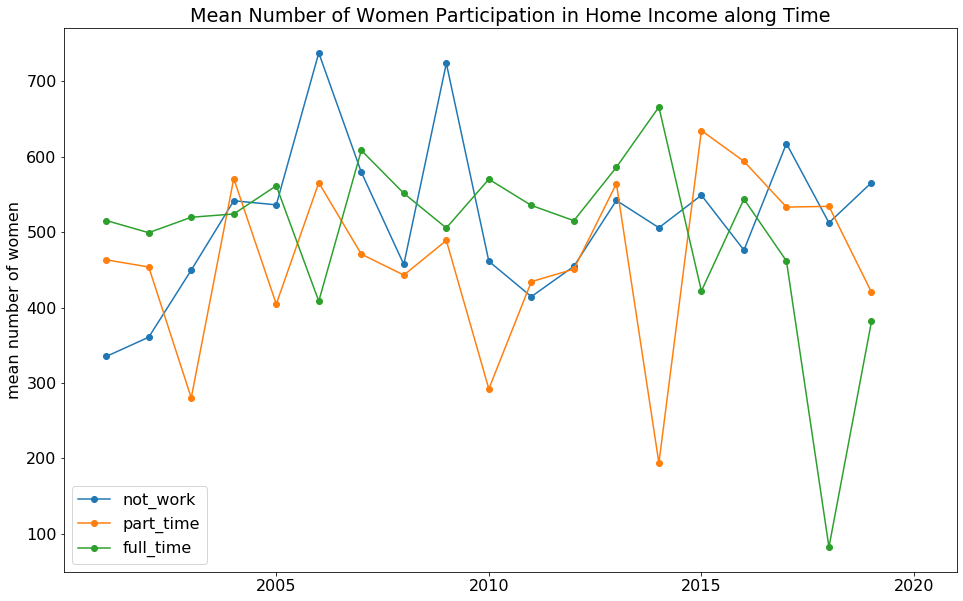

In [15]:
plt.rcParams.update({'font.size': 16})

dffk.groupby(['year_data', 'partic'])['number_women'].mean().unstack().plot(kind='line', figsize=(16, 10),
                                                                               marker='o',
                                                                         title='Mean Number of Women Participation in Home Income along Time')
plt.ylabel('mean number of women')
plt.xlabel('')
plt.xticks([2005, 2010, 2015, 2020])
plt.xlim(2000, 2021)

labels = dffk['partic'].unique()
plt.legend(labels, loc='lower left')

plt.show()

Another way to plot with pandas to specify the type of plot and then the columns of the dataframe you want to visualize

Boxplot with grouped data

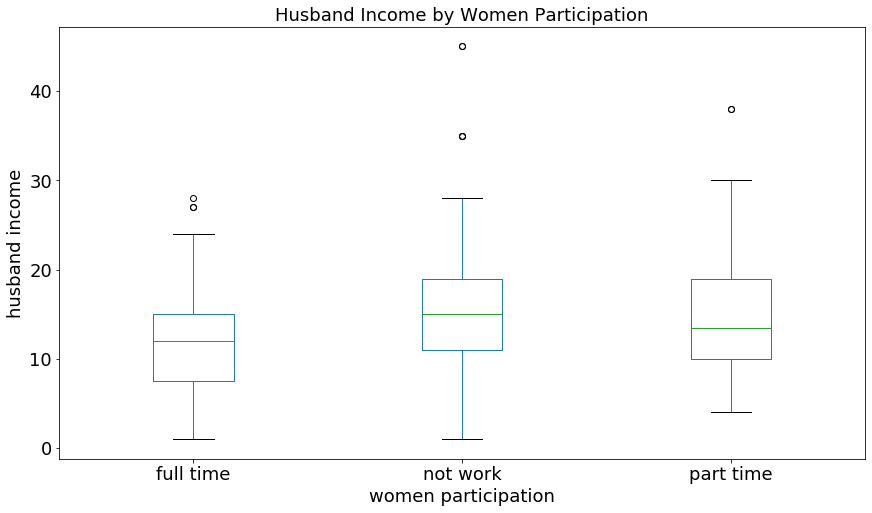

In [16]:
df.boxplot('hincome', by='partic', figsize=(14,8))

plt.xlabel('women participation', fontsize=18)
plt.ylabel('husband income', fontsize=18)

plt.xticks([1, 2, 3], ['full time', 'not work', 'part time'])

plt.tick_params(axis='both', labelsize=18)

plt.title('Husband Income by Women Participation', fontsize=18)
plt.suptitle('') #to plot the title I set in title_boxplot

plt.grid(False)

plt.show()

Histogram

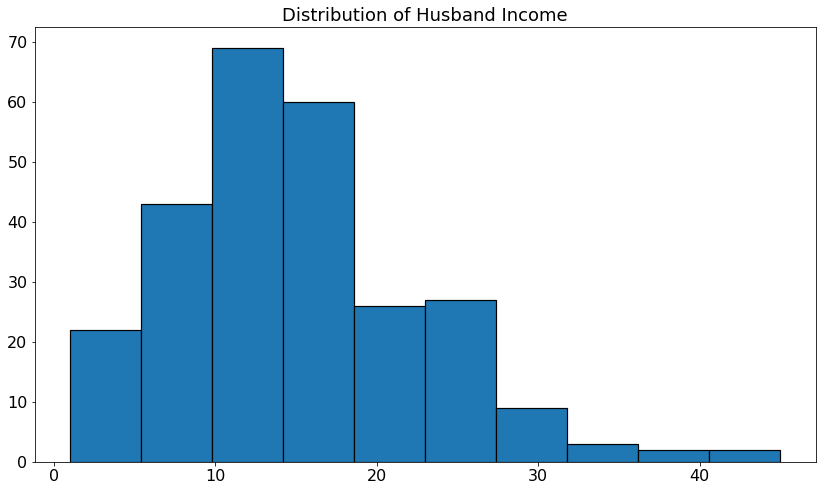

In [17]:
df.hist(column='hincome', edgecolor='black', linewidth=1.2, grid=False, figsize=(14,8))

plt.title('Distribution of Husband Income', fontsize=18)
plt.show();

If you need to save your plot just add this and specify the path to where you want to save it and file name:

`plt.savefig('images/save_my_histogram.png')`

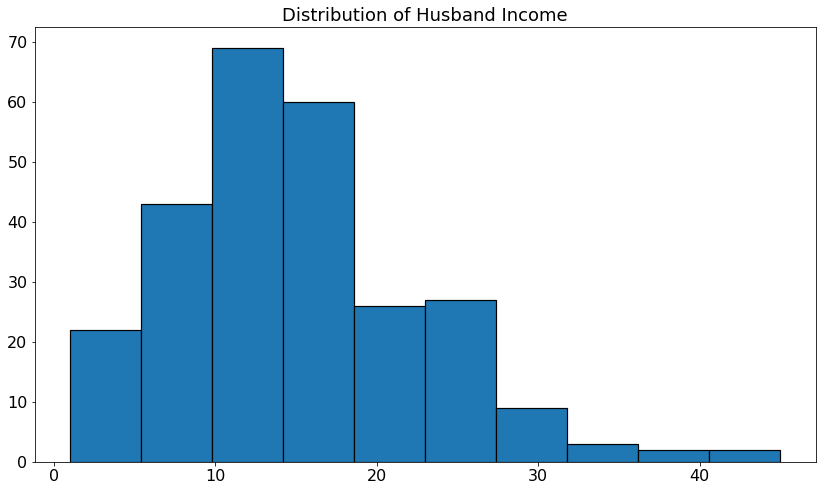

In [18]:
df.hist(column='hincome', edgecolor='black', linewidth=1.2, grid=False, figsize=(14,8))

plt.title('Distribution of Husband Income', fontsize=18)

plt.savefig('images/save_my_histogram.png')